In [2]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff

path = r"C:\Users\gaeta\Documents\Ynov\master1\mathematique appliqués\projet_data_manquantes\dataset_2202_elevators.arff"
data = loadarff(path)
df = pd.DataFrame(data[0])
df.head()

,climbRate,Sgz,'p','q',curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime2,diffSaTime3,diffSaTime4,Sa,Goal
0,118.0,-55.0,-0.28,-0.08,-0.2,-11.0,11.0,0.005,-0.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.031
1,390.0,-45.0,-0.06,-0.07,-0.6,-12.0,11.0,0.010,-0.2,-0.0008,-0.0008,-0.0008,-0.0008,0.0000,0.0,0.0,0.0,-0.0008,0.034
2,68.0,6.0,0.11,0.15,0.6,-10.0,-9.0,-0.003,-0.2,-0.0011,-0.0010,-0.0010,-0.0010,-0.0002,0.0,0.0,0.0,-0.0010,0.033
3,-358.0,-12.0,-0.20,0.13,-0.3,-11.0,-7.0,0.001,-0.1,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.032
4,-411.0,-19.0,-0.18,0.02,-0.5,-11.0,-3.0,0.002,1.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.030


In [338]:
print(df.info())

# Utiliser isna() pour détecter les valeurs manquantes, puis sum() pour compter
missing_values = df.isna().sum()
# Afficher le nombre de valeurs manquantes par colonne
print("Nombre de valeurs manquantes par colonne :")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     16599 non-null  float64
 1   Sgz           16599 non-null  float64
 2   'p'           16599 non-null  float64
 3   'q'           16599 non-null  float64
 4   curRoll       16599 non-null  float64
 5   absRoll       16599 non-null  float64
 6   diffClb       16599 non-null  float64
 7   diffRollRate  16599 non-null  float64
 8   diffDiffClb   16599 non-null  float64
 9   SaTime1       16599 non-null  float64
 10  SaTime2       16599 non-null  float64
 11  SaTime3       16599 non-null  float64
 12  SaTime4       16599 non-null  float64
 13  diffSaTime1   16599 non-null  float64
 14  diffSaTime2   16599 non-null  float64
 15  diffSaTime3   16599 non-null  float64
 16  diffSaTime4   16599 non-null  float64
 17  Sa            16599 non-null  float64
 18  Goal          16599 non-nu

# ---- CREATION DES COLONNES MANQUANTES MCAR MAR MNAR -----

## création de colonne "Missing Completely at Random" (MCAR) dans le df 'df_mcar'
(colonne "climbRate" qui n'a pas de lien avec d'autres colonnes ou 10% des valeurs sont effacées de manière random)

In [339]:
df_mcar = df.copy()

# Nombre de valeurs à remplacer par NaN (10% de la taille de la colonne)
values_to_replace = int(0.1 * len(df_mcar['climbRate']))

# Sélection aléatoire des indices des valeurs à remplacer par NaN
indices_to_replace = np.random.choice(df_mcar.index, size=values_to_replace, replace=False)

# Remplacement des valeurs sélectionnées par NaN dans la première colonne
df_mcar.loc[indices_to_replace, 'climbRate'] = np.nan

# Affichage du DataFrame après suppression
print(df_mcar)

       climbRate   Sgz   'p'   'q'  curRoll  absRoll  diffClb  diffRollRate  \
0          118.0 -55.0 -0.28 -0.08     -0.2    -11.0     11.0         0.005   
1          390.0 -45.0 -0.06 -0.07     -0.6    -12.0     11.0         0.010   
2           68.0   6.0  0.11  0.15      0.6    -10.0     -9.0        -0.003   
3         -358.0 -12.0 -0.20  0.13     -0.3    -11.0     -7.0         0.001   
4         -411.0 -19.0 -0.18  0.02     -0.5    -11.0     -3.0         0.002   
...          ...   ...   ...   ...      ...      ...      ...           ...   
16594      299.0 -28.0  0.08 -0.12     -0.3     -9.0     15.0         0.010   
16595       84.0   0.0  0.14  0.14      1.1     -8.0    -11.0        -0.014   
16596     -208.0  -6.0 -0.48  0.09      0.2     -9.0     -7.0        -0.010   
16597     -146.0 -14.0 -0.38 -0.03     -0.8    -10.0     10.0         0.010   
16598      282.0 -11.0  0.10 -0.12     -1.2    -10.0     16.0         0.016   

       diffDiffClb  SaTime1  SaTime2  SaTime3  SaTi

In [340]:
df_mcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     14940 non-null  float64
 1   Sgz           16599 non-null  float64
 2   'p'           16599 non-null  float64
 3   'q'           16599 non-null  float64
 4   curRoll       16599 non-null  float64
 5   absRoll       16599 non-null  float64
 6   diffClb       16599 non-null  float64
 7   diffRollRate  16599 non-null  float64
 8   diffDiffClb   16599 non-null  float64
 9   SaTime1       16599 non-null  float64
 10  SaTime2       16599 non-null  float64
 11  SaTime3       16599 non-null  float64
 12  SaTime4       16599 non-null  float64
 13  diffSaTime1   16599 non-null  float64
 14  diffSaTime2   16599 non-null  float64
 15  diffSaTime3   16599 non-null  float64
 16  diffSaTime4   16599 non-null  float64
 17  Sa            16599 non-null  float64
 18  Goal          16599 non-nu

## création de colonne "Missing at Random" (MAR) dans le df 'df_mar'
(suppression de 10% des valeurs de la colonne "climbRate" sur les enregistrements ayant les valeurs de la colonne "Sgz" le plus élevé

In [341]:
df_mar = df.copy()

# trie du dataframe sur les valeurs de la colonne 'Sgz'
df_mar = df_mar.sort_values(by='Sgz', ascending=False)

# Nombre de valeurs à remplacer par NaN (10% de la taille de la colonne)
index_to_replace = int(0.1 * len(df_mar))
print(index_to_replace)

# Suppression de 10% des valeurs de de la colonne"climbRate'
df_mar.climbRate[:index_to_replace] = np.nan
print(df_mar.sort_index())

1659
       climbRate   Sgz   'p'   'q'  curRoll  absRoll  diffClb  diffRollRate  \
0          118.0 -55.0 -0.28 -0.08     -0.2    -11.0     11.0         0.005   
1          390.0 -45.0 -0.06 -0.07     -0.6    -12.0     11.0         0.010   
2           68.0   6.0  0.11  0.15      0.6    -10.0     -9.0        -0.003   
3         -358.0 -12.0 -0.20  0.13     -0.3    -11.0     -7.0         0.001   
4         -411.0 -19.0 -0.18  0.02     -0.5    -11.0     -3.0         0.002   
...          ...   ...   ...   ...      ...      ...      ...           ...   
16594      299.0 -28.0  0.08 -0.12     -0.3     -9.0     15.0         0.010   
16595       84.0   0.0  0.14  0.14      1.1     -8.0    -11.0        -0.014   
16596     -208.0  -6.0 -0.48  0.09      0.2     -9.0     -7.0        -0.010   
16597     -146.0 -14.0 -0.38 -0.03     -0.8    -10.0     10.0         0.010   
16598      282.0 -11.0  0.10 -0.12     -1.2    -10.0     16.0         0.016   

       diffDiffClb  SaTime1  SaTime2  SaTime3 

In [342]:
df_mar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16599 entries, 110 to 12588
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     14940 non-null  float64
 1   Sgz           16599 non-null  float64
 2   'p'           16599 non-null  float64
 3   'q'           16599 non-null  float64
 4   curRoll       16599 non-null  float64
 5   absRoll       16599 non-null  float64
 6   diffClb       16599 non-null  float64
 7   diffRollRate  16599 non-null  float64
 8   diffDiffClb   16599 non-null  float64
 9   SaTime1       16599 non-null  float64
 10  SaTime2       16599 non-null  float64
 11  SaTime3       16599 non-null  float64
 12  SaTime4       16599 non-null  float64
 13  diffSaTime1   16599 non-null  float64
 14  diffSaTime2   16599 non-null  float64
 15  diffSaTime3   16599 non-null  float64
 16  diffSaTime4   16599 non-null  float64
 17  Sa            16599 non-null  float64
 18  Goal          16599 non-null 

## création de colonne "Missing Not at Random" (MNAR) dans le df 'df_mnar'
(colonne "climbRate" effacé de manière non aléaoire, ou 10% des valeurs les plus hautes sont effacées)

In [343]:
df_mnar = df.copy()

# trie du dataframe sur les valeurs de la colonne 'climbRate'
df_mnar = df_mnar.sort_values(by='climbRate', ascending=False)

# Nombre de valeurs à remplacer par NaN (10% de la taille de la colonne)
index_to_replace = int(0.1 * len(df_mnar))
print(index_to_replace)

# Suppression de 10% des valeurs de de la colonne"climbRate'
df_mnar.climbRate[:index_to_replace] = np.nan
print(df_mnar.sort_index())

1659
       climbRate   Sgz   'p'   'q'  curRoll  absRoll  diffClb  diffRollRate  \
0          118.0 -55.0 -0.28 -0.08     -0.2    -11.0     11.0         0.005   
1            NaN -45.0 -0.06 -0.07     -0.6    -12.0     11.0         0.010   
2           68.0   6.0  0.11  0.15      0.6    -10.0     -9.0        -0.003   
3         -358.0 -12.0 -0.20  0.13     -0.3    -11.0     -7.0         0.001   
4         -411.0 -19.0 -0.18  0.02     -0.5    -11.0     -3.0         0.002   
...          ...   ...   ...   ...      ...      ...      ...           ...   
16594      299.0 -28.0  0.08 -0.12     -0.3     -9.0     15.0         0.010   
16595       84.0   0.0  0.14  0.14      1.1     -8.0    -11.0        -0.014   
16596     -208.0  -6.0 -0.48  0.09      0.2     -9.0     -7.0        -0.010   
16597     -146.0 -14.0 -0.38 -0.03     -0.8    -10.0     10.0         0.010   
16598      282.0 -11.0  0.10 -0.12     -1.2    -10.0     16.0         0.016   

       diffDiffClb  SaTime1  SaTime2  SaTime3 

In [344]:
df_mnar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16599 entries, 198 to 5068
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     14940 non-null  float64
 1   Sgz           16599 non-null  float64
 2   'p'           16599 non-null  float64
 3   'q'           16599 non-null  float64
 4   curRoll       16599 non-null  float64
 5   absRoll       16599 non-null  float64
 6   diffClb       16599 non-null  float64
 7   diffRollRate  16599 non-null  float64
 8   diffDiffClb   16599 non-null  float64
 9   SaTime1       16599 non-null  float64
 10  SaTime2       16599 non-null  float64
 11  SaTime3       16599 non-null  float64
 12  SaTime4       16599 non-null  float64
 13  diffSaTime1   16599 non-null  float64
 14  diffSaTime2   16599 non-null  float64
 15  diffSaTime3   16599 non-null  float64
 16  diffSaTime4   16599 non-null  float64
 17  Sa            16599 non-null  float64
 18  Goal          16599 non-null  

# Résumé:

In [345]:
# Dans le df "df_mcar", La colonne "climbRate" représente le "Missing Completely at Random" (MCAR) ou 10% des valeurs sont effacées

# Dans le df "df_mar", La colonne "climbRate" représente le "Missing at Random" (MAR) en lien avec la colonne "Sgz" ou 10% des valeurs sont effacées

# Dans le df "df_mnar", La colonne "climbRate" représente le "Missing Not at Random" (MNAR) ou 10% des valeurs les plus hautes sont effacées

# --------   Analyse des données ---------

## Analyse de la correlation du df d'origine

<Axes: >

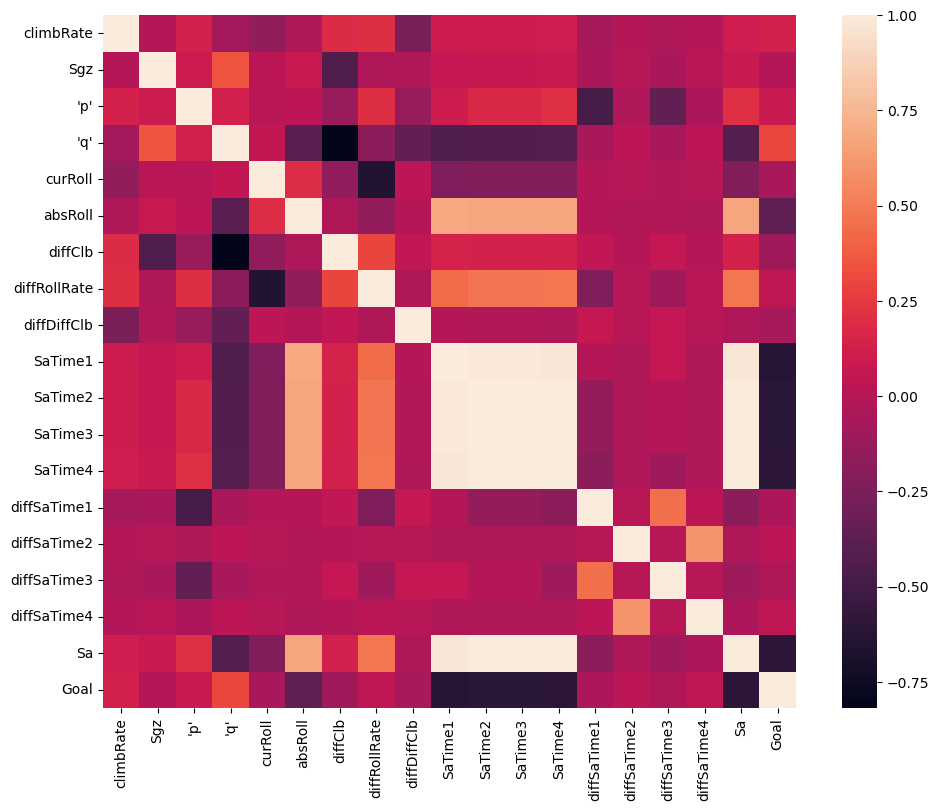

In [346]:
import matplotlib.pyplot as plt
import seaborn as sns

df_normalise = df.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_normalise, vmax=1, square=True)

## Analyse des données manquantes

### Analyse des données manquantes de la colonne 'climbRate' sur le MCAR

C:\Users\gaeta\AppData\Local\Temp\ipykernel_22732\2438878891.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


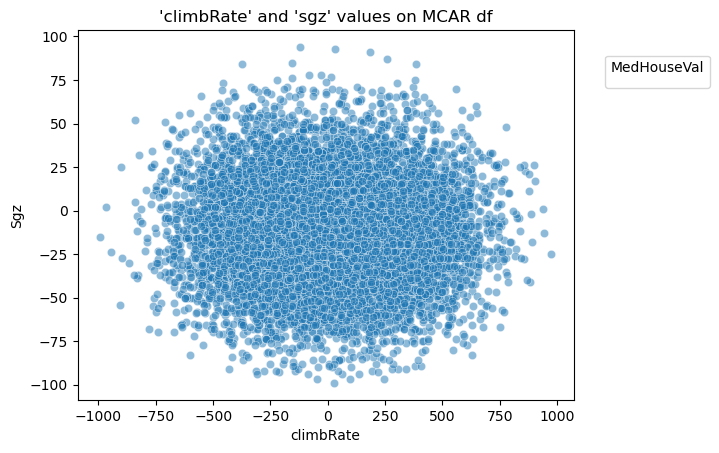

In [347]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df_mcar,
    x=df_mcar["climbRate"],
    y=df_mcar["Sgz"],
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_= plt.title("'climbRate' and 'sgz' values on MCAR df")

### Analyse des répartition de valeurs de la colonne 'climbRate' sur le df_MCAR par rapport au df d'origine

(array([   6.,   13.,   57.,  141.,  277.,  570., 1019., 1558., 2198.,
        2061., 1829., 1632., 1330.,  988.,  601.,  367.,  185.,   75.,
          23.,   10.]),
 array([-993. , -894.7, -796.4, -698.1, -599.8, -501.5, -403.2, -304.9,
        -206.6, -108.3,  -10. ,   88.3,  186.6,  284.9,  383.2,  481.5,
         579.8,  678.1,  776.4,  874.7,  973. ]),
 <BarContainer object of 20 artists>)

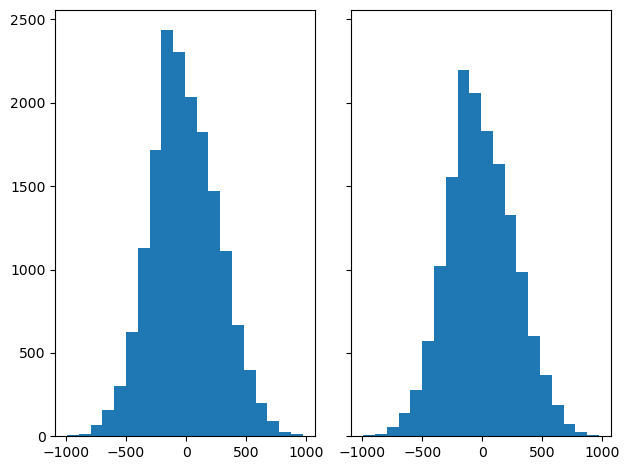

In [348]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(df["climbRate"], bins=20)
axs[1].hist(df_mcar["climbRate"], bins=20)

### Analyse des données manquantes de la colonne 'climbRate'  sur le MAR

C:\Users\gaeta\AppData\Local\Temp\ipykernel_22732\658065782.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


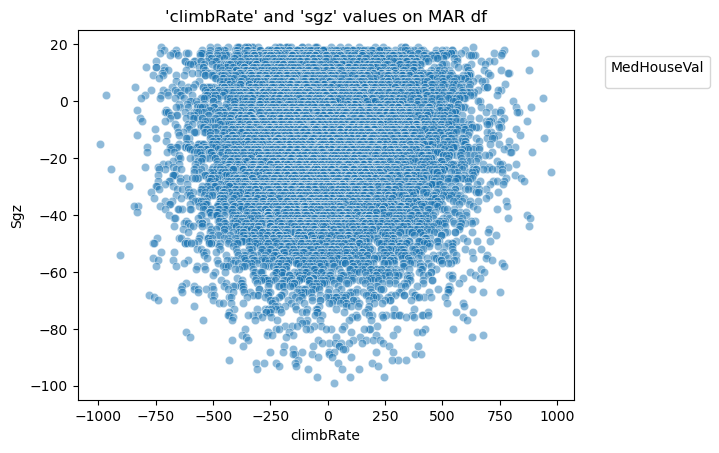

In [349]:
sns.scatterplot(
    data=df_mar,
    x=df_mar["climbRate"],
    y=df_mar["Sgz"],
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_= plt.title("'climbRate' and 'sgz' values on MAR df")

### Analyse des répartition de valeurs de la colonne 'climbRate' sur le df_MAR par rapport au df d'origine

(array([   5.,   11.,   55.,  128.,  262.,  533., 1006., 1530., 2214.,
        2124., 1859., 1672., 1329.,  992.,  582.,  359.,  168.,   78.,
          24.,    9.]),
 array([-993. , -894.7, -796.4, -698.1, -599.8, -501.5, -403.2, -304.9,
        -206.6, -108.3,  -10. ,   88.3,  186.6,  284.9,  383.2,  481.5,
         579.8,  678.1,  776.4,  874.7,  973. ]),
 <BarContainer object of 20 artists>)

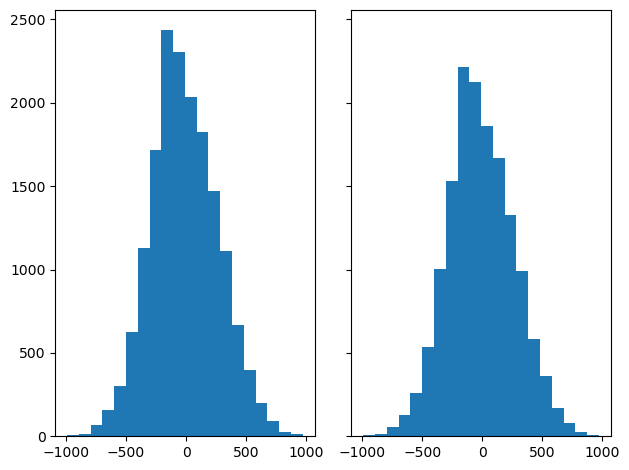

In [350]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(df["climbRate"], bins=20)
axs[1].hist(df_mar["climbRate"], bins=20)

### Analyse des données manquantes de la colonne 'climbRate' sur le MNAR

C:\Users\gaeta\AppData\Local\Temp\ipykernel_22732\1963820844.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


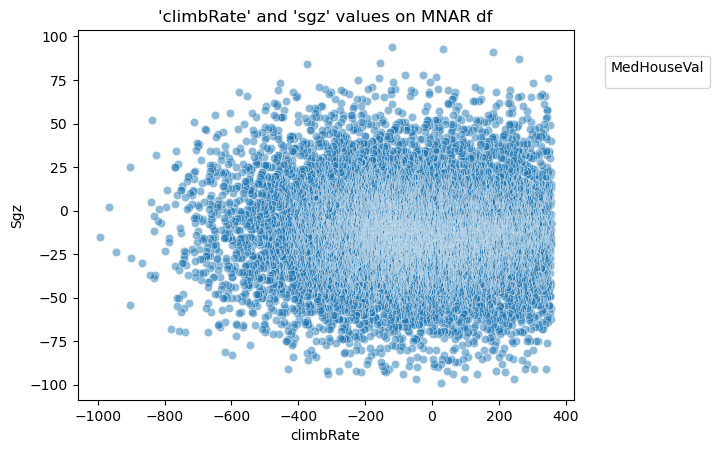

In [351]:
sns.scatterplot(
    data=df_mnar,
    x=df_mnar["climbRate"],
    y=df_mnar["Sgz"],
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_= plt.title("'climbRate' and 'sgz' values on MNAR df")

### Analyse des répartition de valeurs de la colonne 'climbRate' sur le df_MNAR par rapport au df d'origine

(array([   3.,    4.,   14.,   40.,   85.,  115.,  203.,  331.,  538.,
         800., 1003., 1383., 1709., 1685., 1444., 1397., 1256., 1168.,
         957.,  805.]),
 array([-993.  , -925.55, -858.1 , -790.65, -723.2 , -655.75, -588.3 ,
        -520.85, -453.4 , -385.95, -318.5 , -251.05, -183.6 , -116.15,
         -48.7 ,   18.75,   86.2 ,  153.65,  221.1 ,  288.55,  356.  ]),
 <BarContainer object of 20 artists>)

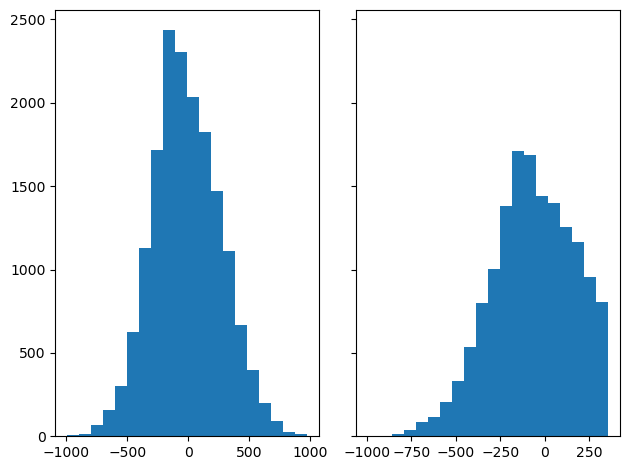

In [352]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(df["climbRate"], bins=20)
axs[1].hist(df_mnar["climbRate"], bins=20)

# ----- Gestion des données manquantes par types de valeurs nulles -------

## TEST 1 : Suppression des rows avec des valeurs nulles
(la suppression est évalué sur un scoring du RandomForestRegressor)

### Sur le df d'origine sans valeurs nulles

In [353]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y = df['Goal']
X = df.drop(columns=['Goal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)



from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)
reg.score(X_test, y_test)

0.8403328287217866

Feature ranking:
1. feature 9 (0.379143)
2. feature 7 (0.193282)
3. feature 5 (0.142778)
4. feature 0 (0.045113)
5. feature 10 (0.029693)
6. feature 11 (0.027916)
7. feature 17 (0.025931)
8. feature 2 (0.025772)
9. feature 12 (0.025071)
10. feature 3 (0.021958)
11. feature 4 (0.020968)
12. feature 1 (0.020916)
13. feature 6 (0.018034)
14. feature 8 (0.014821)
15. feature 13 (0.004804)
16. feature 15 (0.003799)
17. feature 16 (0.000002)
18. feature 14 (0.000000)


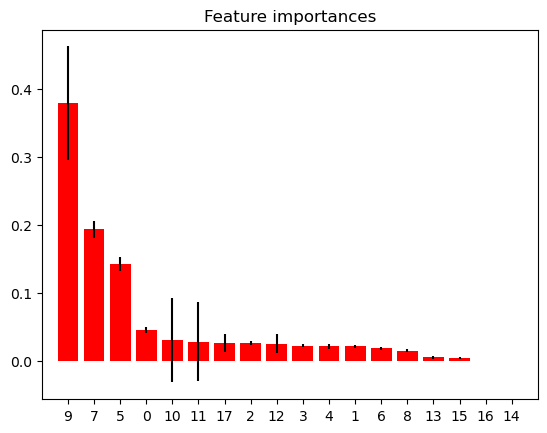

In [354]:
from sklearn.ensemble import ExtraTreesClassifier

importances = reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in reg.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Sur le df MCAR

In [355]:
df_mcar_delete = df_mcar.copy()
print('index avant suppression :', len(df_mcar_delete))
df_mcar_delete = df_mcar_delete.dropna(subset=['climbRate'])
print('index après suppression :', len(df_mcar_delete))

index avant suppression : 16599
index après suppression : 14940


In [356]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y = df_mcar_delete['Goal']
X = df_mcar_delete.drop(columns=['Goal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)
reg.score(X_test, y_test)

0.8383960338959489

### Sur le df MAR

In [357]:
df_mar_delete = df_mar.copy()
print('index avant suppression :', len(df_mar_delete))
df_mar_delete = df_mar_delete.dropna(subset=['climbRate'])
print('index après suppression :', len(df_mar_delete))

index avant suppression : 16599
index après suppression : 14940


In [358]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y = df_mar_delete['Goal']
X = df_mar_delete.drop(columns=['Goal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(X_train, y_train)
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor().fit(X_train, y_train)
reg.score(X_test, y_test)

0.8427622062318845

### Sur le df MNAR

In [359]:
df_mnar_delete = df_mnar.copy()
print('index avant suppression :', len(df_mnar_delete))
df_mnar_delete = df_mar_delete.dropna(subset=['climbRate'])
print('index après suppression :', len(df_mnar_delete))

index avant suppression : 16599
index après suppression : 14940


In [360]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y = df_mnar_delete['Goal']
X = df_mnar_delete.drop(columns=['Goal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)
reg.score(X_test, y_test)

0.8430803779627515

### Résultat du TEST1 (suppression des rows avec des valeurs nulles)

In [1]:
# Voici le résultat des scoring du RandomForestRegressor suivant les suppressions des rows à valeurs nulles :

# pour le dataframe avec la colonne sans valeur nulles : scoring de 0.8406384248834674
# pour le dataframe avec la colonne en MCAR : scoring de 0.8391590663568027
# pour le dataframe avec la colonne en MAR : scoring de 0.8429934809702377
# pour le dataframe avec la colonne en MNAR : scoring de 0.8413046286037973

## TEST 2: Imputation par la moyenne des valeurs nulles
(L'imputation est réalisé par un remplacement des valeurs nulles par la moyenne des valeurs de la colonnes.
La méthode est évalué sur un scoring de RMSE et de MAE)

### Sur le df MCAR

In [362]:
df_mcar_average = df_mcar.copy()

# recupère la moyenne de df_mcar_average['climbRate']
climbRate_average = df_mcar_average['climbRate'].mean()
print(climbRate_average)

#remplace les valeurs NaN de df_mcar_average['climbRate'] par la moyenne
df_mcar_average['climbRate'].fillna(climbRate_average, inplace=True)

print(df_mcar_average)
print(len(df_mcar_average))

-12.49665327978581
       climbRate   Sgz   'p'   'q'  curRoll  absRoll  diffClb  diffRollRate  \
0          118.0 -55.0 -0.28 -0.08     -0.2    -11.0     11.0         0.005   
1          390.0 -45.0 -0.06 -0.07     -0.6    -12.0     11.0         0.010   
2           68.0   6.0  0.11  0.15      0.6    -10.0     -9.0        -0.003   
3         -358.0 -12.0 -0.20  0.13     -0.3    -11.0     -7.0         0.001   
4         -411.0 -19.0 -0.18  0.02     -0.5    -11.0     -3.0         0.002   
...          ...   ...   ...   ...      ...      ...      ...           ...   
16594      299.0 -28.0  0.08 -0.12     -0.3     -9.0     15.0         0.010   
16595       84.0   0.0  0.14  0.14      1.1     -8.0    -11.0        -0.014   
16596     -208.0  -6.0 -0.48  0.09      0.2     -9.0     -7.0        -0.010   
16597     -146.0 -14.0 -0.38 -0.03     -0.8    -10.0     10.0         0.010   
16598      282.0 -11.0  0.10 -0.12     -1.2    -10.0     16.0         0.016   

       diffDiffClb  SaTime1  SaT

In [363]:
# RMSE
from sklearn.metrics import mean_squared_error
print("RMSE = ", mean_squared_error(df['climbRate'], df_mcar_average['climbRate'], squared = False))

# MAE
from sklearn.metrics import mean_absolute_error
print("MAE = ",  mean_absolute_error(df['climbRate'], df_mcar_average['climbRate']))

RMSE =  87.08735853246743
MAE =  21.921540490536156


C:\Users\gaeta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Sur le df MAR

In [364]:
df_mar_average = df_mar.copy()

# recupère la moyenne de df_mar_average['climbRate']
climbRate_average = df_mar_average['climbRate'].mean()
print(climbRate_average)

#remplace les valeurs NaN de df_mar_average['climbRate'] par la moyenne
df_mar_average['climbRate'].fillna(climbRate_average, inplace=True)

print(df_mar_average)
print(len(df_mar_average))

-10.520883534136546
        climbRate   Sgz   'p'   'q'  curRoll  absRoll  diffClb  diffRollRate  \
110    -10.520884  94.0 -0.36  0.12      0.4    -11.0     -9.0        -0.008   
4839   -10.520884  93.0  0.33  0.09     -1.4     -9.0    -10.0         0.015   
4838   -10.520884  91.0  0.18  0.19     -1.7    -10.0    -20.0         0.015   
109    -10.520884  87.0  0.12  0.06      1.1    -10.0     -4.0        -0.015   
8647   -10.520884  85.0 -0.30  0.18      0.3     -8.0    -19.0        -0.002   
...           ...   ...   ...   ...      ...      ...      ...           ...   
14370 -310.000000 -94.0 -0.23 -0.15      0.6    -14.0     29.0        -0.013   
7362    95.000000 -97.0  0.29 -0.11     -1.9     -8.0     13.0         0.017   
12589  245.000000 -97.0 -0.23 -0.07     -0.2    -15.0     18.0         0.025   
10153  -48.000000 -97.0 -0.15 -0.15     -0.8    -11.0     28.0         0.015   
12588   28.000000 -99.0 -0.42 -0.14      0.2    -15.0     24.0         0.004   

       diffDiffClb 

In [365]:
# RMSE
from sklearn.metrics import mean_squared_error
print("RMSE = ", mean_squared_error(df['climbRate'], df_mar_average['climbRate'], squared = False))

# MAE
from sklearn.metrics import mean_absolute_error
print("MAE = ",  mean_absolute_error(df['climbRate'], df_mar_average['climbRate']))

RMSE =  379.66705353477636
MAE =  302.1352199568803


C:\Users\gaeta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Sur le df MNAR

In [366]:
df_mnar_average = df_mnar.copy()

# recupère la moyenne de df_mnar_average['climbRate']
climbRate_average = df_mnar_average['climbRate'].mean()
print(climbRate_average)

#remplace les valeurs NaN de df_mnar_average['climbRate'] par la moyenne
df_mnar_average['climbRate'].fillna(climbRate_average, inplace=True)

print(df_mnar_average)
print(len(df_mnar_average))

-67.59062918340027
        climbRate   Sgz   'p'   'q'  curRoll  absRoll  diffClb  diffRollRate  \
198    -67.590629 -25.0 -0.13  0.09      0.9     -9.0     -4.0         0.001   
199    -67.590629 -13.0 -0.18  0.24      0.8     -9.0     -6.0        -0.010   
13139  -67.590629   1.0  0.20  0.15     -2.7    -16.0      9.0         0.020   
6058   -67.590629  17.0  0.20 -0.02     -0.3     -9.0      0.0         0.002   
4968   -67.590629  21.0  0.07  0.22      1.0     -7.0     -1.0        -0.009   
...           ...   ...   ...   ...      ...      ...      ...           ...   
4819  -903.000000  25.0  0.09  0.13      1.1     -7.0    -11.0        -0.013   
9620  -904.000000 -54.0 -0.71  0.04      0.3    -10.0      0.0         0.001   
6567  -945.000000 -24.0  0.18 -0.16      2.3    -10.0     11.0        -0.019   
4820  -966.000000   2.0 -0.06 -0.32      1.1     -7.0     14.0        -0.008   
5068  -993.000000 -15.0 -0.21 -0.19      1.9     -6.0      3.0        -0.012   

       diffDiffClb  

In [367]:
# RMSE
from sklearn.metrics import mean_squared_error
print("RMSE = ", mean_squared_error(df['climbRate'], df_mnar_average['climbRate'], squared = False))

# MAE
from sklearn.metrics import mean_absolute_error
print("MAE = ",  mean_absolute_error(df['climbRate'], df_mnar_average['climbRate']))

RMSE =  357.3177013072203
MAE =  284.6381979430867


C:\Users\gaeta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Résultat du TEST2 (imputation par les moyenne des valeurs nulles)

In [2]:
# Voici le résultat des scoring du RMSE et du MAE suivant les imputations par la moyenne des valeurs nulles :

# pour le dataframe avec la colonne en MCAR : 
# RMSE scoring de 87.88610580305395
# MAE scoring de 22.338792086231546
# pour le dataframe avec la colonne en MAR :
# RMSE scoring de 379.66705353477636
# MAE scoring de 302.1352199568803
# pour le dataframe avec la colonne en MNAR :
# RMSE scoring de 357.3177013072203
# MAE scoring de 284.6381979430867

## TEST 3 : Imputation par l'algorithme d'espérance maximisation des valeurs nulles
(L'imputation est réalisé par un remplacement des valeurs nulles par la valeur donné par l'algorithme d'espérance maximisation.
La méthode est évalué sur un scoring de correlation, de RMSE, de MAE, et de RandomForestRegressor)

In [369]:
# note: bic (indice bayésien d'information) = critère de selection de modele utilisé pour comparer differents 
# modèles statistiques et qui permet de selectionner le nombre optimal de composant pour l'algo Gaussian Mixture 

### Sur le df MAR

In [370]:
import numpy as np
from sklearn.mixture import GaussianMixture

# données manquantes au hasard moins les NAN
X = df_mar.dropna().values

# liste pour stocker les BIC
bics = []

# Tester différents nombres de composants
for n_components in range(1, 11):
    gm = GaussianMixture(n_components=n_components, random_state=0).fit(X)
    bics.append(gm.bic(X))

# Trouver le nombre de composants avec le BIC le plus bas
best_n_components = np.argmin(bics) + 1

print(f"Le nombre optimal de composants est {best_n_components}")

Le nombre optimal de composants est 7


In [371]:
df_array = df_mar.values
missing_mask = np.isnan(df_array)
em_imputer = GaussianMixture(n_components=7, covariance_type='full', max_iter=100)
complete_rows = ~missing_mask.any(axis=1)
em_imputer.fit(df_array[complete_rows])
imputed_values = em_imputer.means_
df_em_imputed = df_array.copy()
df_em_imputed[missing_mask] = np.take(imputed_values, np.where(missing_mask)[1])
new_df = pd.DataFrame(df_em_imputed, columns=df.columns)

#### Comparaison de la correlation entre le df original, le df_mar avec les valeurs nulles et le df_mar_imputed par l'EM

In [372]:
correlations_df_original = df.corr()['Goal'].sort_values(ascending=False)
correl1 = pd.DataFrame(correlations_df_original)
correl_rename1 = correl1.rename(columns={'Goal': 'df_original'})

correlations_df_mar = df_mar.corr()['Goal'].sort_values(ascending=False)
correl2 = pd.DataFrame(correlations_df_mar)
correl_rename2 = correl2.rename(columns={'Goal': 'df_mar'})

correlations_df_mar_imputed = new_df.corr()['Goal'].sort_values(ascending=False)
correl3 = pd.DataFrame(correlations_df_mar_imputed)
correl_rename3 = correl3.rename(columns={'Goal': 'df_mar_imputed'})

result = pd.concat([correl_rename1, correl_rename2, correl_rename3], axis = 1)
print(result)

              df_original    df_mar  df_mar_imputed
Goal             1.000000  1.000000        1.000000
'q'              0.301956  0.301956        0.301956
climbRate        0.128301  0.122293        0.117929
'p'              0.079040  0.079040        0.079040
diffSaTime4      0.038859  0.038859        0.038859
diffRollRate     0.037652  0.037652        0.037652
diffSaTime2      0.025905  0.025905        0.025905
Sgz             -0.009006 -0.009006       -0.009006
diffSaTime3     -0.033782 -0.033782       -0.033782
diffSaTime1     -0.042784 -0.042784       -0.042784
curRoll         -0.059779 -0.059779       -0.059779
diffDiffClb     -0.066229 -0.066229       -0.066229
diffClb         -0.094931 -0.094931       -0.094931
absRoll         -0.364708 -0.364708       -0.364708
SaTime4         -0.606615 -0.606615       -0.606615
Sa              -0.606698 -0.606698       -0.606698
SaTime2         -0.613627 -0.613627       -0.613627
SaTime3         -0.613668 -0.613668       -0.613668
SaTime1     

#### Scoring du df_mar imputé par l'EM en utilisant le RMSE et le MAE

In [373]:
# RMSE
from sklearn.metrics import mean_squared_error
print("RMSE = ", mean_squared_error(df['climbRate'], new_df['climbRate'], squared = False))

# MAE
from sklearn.metrics import mean_absolute_error
print("MAE = ",  mean_absolute_error(df['climbRate'], new_df['climbRate']))

RMSE =  379.73614917190736
MAE =  302.3329411450251


C:\Users\gaeta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Scoring du df_mar imputé par l'EM en utilisant le RandomForestRegressor

In [374]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = new_df.drop(columns=['Goal'])
y = new_df['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)
reg.score(X_test, y_test)

0.8462167434076275

#### Scoring de reference du df_mar avec les valeurs nulles en utilisant le RandomForestRegressor

In [375]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df_mar.drop(columns=['Goal'])
y = df_mar['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)
reg.score(X_test, y_test)

0.8463618216693917

### Sur le df MNAR

In [376]:
# données manquantes au hasard moins les NAN
X = df_mnar.dropna().values

# liste pour stocker les BIC
bics = []

# Tester différents nombres de composants
for n_components in range(1, 11):
    gm = GaussianMixture(n_components=n_components, random_state=0).fit(X)
    bics.append(gm.bic(X))

# Trouver le nombre de composants avec le BIC le plus bas
best_n_components = np.argmin(bics) + 1

print(f"Le nombre optimal de composants est {best_n_components}")

Le nombre optimal de composants est 7


In [377]:
df_array2 = df_mnar.values
missing_mask = np.isnan(df_array2)
em_imputer = GaussianMixture(n_components=7, covariance_type='full', max_iter=100)
complete_rows = ~missing_mask.any(axis=1)
em_imputer.fit(df_array2[complete_rows])
imputed_values = em_imputer.means_
df_em_imputed = df_array2.copy()
df_em_imputed[missing_mask] = np.take(imputed_values, np.where(missing_mask)[1])
new_df2 = pd.DataFrame(df_em_imputed, columns=df.columns)

#### Comparaison de la correlation entre le df original, le df_mnar avec les valeurs nulles et le df_mnar_imputed par l'EM

In [378]:
correlations_df_original = df.corr()['Goal'].sort_values(ascending=False)
correl1 = pd.DataFrame(correlations_df_original)
correl_rename1 = correl1.rename(columns={'Goal': 'df_original'})

correlations_df_mnar = df_mnar.corr()['Goal'].sort_values(ascending=False)
correl2 = pd.DataFrame(correlations_df_mnar)
correl_rename2 = correl2.rename(columns={'Goal': 'df_mnar'})

correlations_df_mnar_imputed = new_df2.corr()['Goal'].sort_values(ascending=False)
correl3 = pd.DataFrame(correlations_df_mnar_imputed)
correl_rename3 = correl3.rename(columns={'Goal': 'df_mnar_imputed'})

result = pd.concat([correl_rename1, correl_rename2, correl_rename3], axis = 1)
print(result)

              df_original   df_mnar  df_mnar_imputed
Goal             1.000000  1.000000         1.000000
'q'              0.301956  0.301956         0.301956
climbRate        0.128301  0.131670         0.125788
'p'              0.079040  0.079040         0.079040
diffSaTime4      0.038859  0.038859         0.038859
diffRollRate     0.037652  0.037652         0.037652
diffSaTime2      0.025905  0.025905         0.025905
Sgz             -0.009006 -0.009006        -0.009006
diffSaTime3     -0.033782 -0.033782        -0.033782
diffSaTime1     -0.042784 -0.042784        -0.042784
curRoll         -0.059779 -0.059779        -0.059779
diffDiffClb     -0.066229 -0.066229        -0.066229
diffClb         -0.094931 -0.094931        -0.094931
absRoll         -0.364708 -0.364708        -0.364708
SaTime4         -0.606615 -0.606615        -0.606615
Sa              -0.606698 -0.606698        -0.606698
SaTime2         -0.613627 -0.613627        -0.613627
SaTime3         -0.613668 -0.613668        -0.

#### Scoring du df_mnar imputé par l'EM en utilisant le RMSE et le MAE

In [379]:
# RMSE
from sklearn.metrics import mean_squared_error
print("RMSE = ", mean_squared_error(df['climbRate'], new_df2['climbRate'], squared = False))

# MAE
from sklearn.metrics import mean_absolute_error
print("MAE = ",  mean_absolute_error(df['climbRate'], new_df2['climbRate']))

RMSE =  357.32033151773965
MAE =  284.63995222123737


C:\Users\gaeta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Scoring du df_mnar imputé par l'EM en utilisant le RandomForestRegressor

In [380]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = new_df2.drop(columns=['Goal'])
y = new_df2['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)
reg.score(X_test, y_test)

0.8452169666775473

#### Scoring de reference du df_mnar avec les valeurs nulles en utilisant le RandomForestRegressor

In [381]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df_mnar.drop(columns=['Goal'])
y = df_mnar['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)
reg.score(X_test, y_test)

0.8453882907115435

### Sur le df MCAR

In [382]:
# données manquantes au hasard moins les NAN
X = df_mcar.dropna().values

# liste pour stocker les BIC
bics = []

# Tester différents nombres de composants
for n_components in range(1, 11):
    gm = GaussianMixture(n_components=n_components, random_state=0).fit(X)
    bics.append(gm.bic(X))

# Trouver le nombre de composants avec le BIC le plus bas
best_n_components = np.argmin(bics) + 1

print(f"Le nombre optimal de composants est {best_n_components}")

Le nombre optimal de composants est 7


In [383]:
df_array3 = df_mcar.values
missing_mask = np.isnan(df_array)
em_imputer = GaussianMixture(n_components=7, covariance_type='full', max_iter=100)
complete_rows = ~missing_mask.any(axis=1)
em_imputer.fit(df_array[complete_rows])
imputed_values = em_imputer.means_
df_em_imputed = df_array.copy()
df_em_imputed[missing_mask] = np.take(imputed_values, np.where(missing_mask)[1])
new_df3 = pd.DataFrame(df_em_imputed, columns=df.columns)

#### Comparaison de la correlation entre le df original, le df_mcar avec les valeurs nulles et le df_mcar_imputed par l'EM

In [384]:
correlations_df_original = df.corr()['Goal'].sort_values(ascending=False)
correl1 = pd.DataFrame(correlations_df_original)
correl_rename1 = correl1.rename(columns={'Goal': 'df_original'})

correlations_df_mcar = df_mcar.corr()['Goal'].sort_values(ascending=False)
correl2 = pd.DataFrame(correlations_df_mcar)
correl_rename2 = correl2.rename(columns={'Goal': 'df_mcar'})

correlations_df_mcar_imputed = new_df3.corr()['Goal'].sort_values(ascending=False)
correl3 = pd.DataFrame(correlations_df_mcar_imputed)
correl_rename3 = correl3.rename(columns={'Goal': 'df_mcar_imputed'})

result = pd.concat([correl_rename1, correl_rename2, correl_rename3], axis = 1)
print(result)

              df_original   df_mcar  df_mcar_imputed
Goal             1.000000  1.000000         1.000000
'q'              0.301956  0.301956         0.301956
climbRate        0.128301  0.128038         0.119370
'p'              0.079040  0.079040         0.079040
diffSaTime4      0.038859  0.038859         0.038859
diffRollRate     0.037652  0.037652         0.037652
diffSaTime2      0.025905  0.025905         0.025905
Sgz             -0.009006 -0.009006        -0.009006
diffSaTime3     -0.033782 -0.033782        -0.033782
diffSaTime1     -0.042784 -0.042784        -0.042784
curRoll         -0.059779 -0.059779        -0.059779
diffDiffClb     -0.066229 -0.066229        -0.066229
diffClb         -0.094931 -0.094931        -0.094931
absRoll         -0.364708 -0.364708        -0.364708
SaTime4         -0.606615 -0.606615        -0.606615
Sa              -0.606698 -0.606698        -0.606698
SaTime2         -0.613627 -0.613627        -0.613627
SaTime3         -0.613668 -0.613668        -0.

#### Scoring du df_mcar imputé par l'EM en utilisant le RMSE et le MAE

In [385]:
# RMSE
from sklearn.metrics import mean_squared_error
print("RMSE = ", mean_squared_error(df['climbRate'], new_df3['climbRate'], squared = False))

# MAE
from sklearn.metrics import mean_absolute_error
print("MAE = ",  mean_absolute_error(df['climbRate'], new_df3['climbRate']))

RMSE =  379.71454717749333
MAE =  302.0808854897766


C:\Users\gaeta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Scoring du df_mcar imputé par l'EM en utilisant le RandomForestRegressor

In [386]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = new_df3.drop(columns=['Goal'])
y = new_df3['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)
reg.score(X_test, y_test)

0.8463867028000196

#### Scoring de reference du df_mcar avec les valeurs nulles en utilisant le RandomForestRegressor

In [387]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df_mcar.drop(columns=['Goal'])
y = df_mcar['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)
reg.score(X_test, y_test)

0.8411319831865959

### TEST 3: Resultat de l'imputation des valeurs nulles par l'algorithme d'esperance maximisation

In [388]:
# Voici le résultat des scoring des correlations, de RMSE, de MAE, et de RandomForestRegressor,
# suivant les imputations par l'algorithme d'esperance maximisation des différentes valeurs nulles :


# pour le dataframe avec la colonne en MAR :
    # correlation entre le df original, le df_mar et le df_mar_imputed par l'EM:
        #corr df_original : 0.128301
        #corr df_mar : 0.122293
        #corr_df_mar_imputed : 0.118001
    # RMSE scoring de 379.7248286853232
    # MAE scoring de 302.31397341961235
    # RandomForestRegressor:
        # sur le mar : 0.845970047416873
        # sur le mar_imputed : 0.8465518983431846


# pour le dataframe avec la colonne en MNAR :
    # correlation entre le df original, le df_mnar et le df_mnar_imputed par l'EM:
        #corr df_original : 0.128301
        #corr df_mnar : 0.131670
        #corr_df_mnar_imputed : 0.127424
    # RMSE scoring de 356.939652698341
    # MAE scoring de 284.45691999797145
    # RandomForestRegressor:
        # sur le mnar : 0.8471691232008943
        # sur le mnar_imputed : 0.8464407716529573

        
# pour le dataframe avec la colonne en MCAR :
    # correlation entre le df original, le df_mcar et le df_mcar_imputed par l'EM:
        #corr df_original : 0.128301
        #corr df_mcar : 0.132624
        #corr_df_mcar_imputed : 0.118856
    # RMSE scoring de 379.6669925570721
    # MAE scoring de 302.135633825791
    # RandomForestRegressor:
        # sur le mcar : 0.8387200691136282
        # sur le mcar_imputed : 0.8434479507990046